<a href="https://colab.research.google.com/github/pvt198/03MAIR-Algoritmos-de-Optimizaci-n/blob/main/Paolo_Valerio_Testa_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 1 de Algoritmos de Optimizacion

Nombre: Paolo Valerio Testa

https://colab.research.google.com/drive/1EyG5Zz4dlI8-c-wKuivZMwG-7goYYC9I?usp=sharing

https://github.com/pvt198/03MAIR-Algoritmos-de-Optimizaci-n.git


In [1]:
#Torres de Hanoi - Divide y venceras
################################################################################


################################################################
def Torres_Hanoi(N, desde, hasta):
  #N - Nº de fichas
  #desde - torre inicial
  #hasta - torre fina
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)

Torres_Hanoi(3, 1, 3)
################################################################

Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3


In [2]:
def Torres_Hanoi(N, desde, hasta, torres):
    # Caso base: si solo hay una ficha, moverla directamente
    if N == 1:
        # Quitar la ficha de la torre "desde" y agregarla a la torre "hasta"
        disk = torres[desde].pop()  # Extraer la ficha de la torre "desde"
        torres[hasta].append(disk)  # Colocar la ficha en la torre "hasta"

        # Imprimir el movimiento realizado
        print(f"Lleva la ficha {disk} desde torre {desde+1} hasta torre {hasta+1}")
        # Mostrar el estado actual de las torres
        print("Estado de las torres:")
        mostrar_torres(torres)
    else:
        # Mover las N-1 fichas superiores a la torre auxiliar
        Torres_Hanoi(N-1, desde, 3-desde-hasta, torres)

        # Mover la ficha N a la torre de destino
        disk = torres[desde].pop()  # Extraer la ficha de la torre "desde"
        torres[hasta].append(disk)  # Colocar la ficha en la torre "hasta"
        print(f"Lleva la ficha {disk} desde torre {desde+1} hasta torre {hasta+1}")
        print("Estado de las torres:")
        mostrar_torres(torres)

        # Mover las N-1 fichas de la torre auxiliar a la torre de destino
        Torres_Hanoi(N-1, 3-desde-hasta, hasta, torres)

# Función para mostrar el estado de las torres
def mostrar_torres(torres):
    for i, torre in enumerate(torres):
        # Imprimir el número de la torre y las fichas que contiene
        print(f"Torre {i+1}: {torre}")
    # Separador visual entre cada movimiento
    print("-" * 20)

# Inicializamos las 3 torres con N discos
N = 3
torres = [list(range(N, 0, -1)), [], []]  # Torre 1 tiene N fichas, las demás están vacías

# Mostrar estado inicial de las torres
print("Estado inicial de las torres:")
mostrar_torres(torres)

# Ejecutar el algoritmo de Torres de Hanói
Torres_Hanoi(N, 0, 2, torres)


Estado inicial de las torres:
Torre 1: [3, 2, 1]
Torre 2: []
Torre 3: []
--------------------
Lleva la ficha 1 desde torre 1 hasta torre 3
Estado de las torres:
Torre 1: [3, 2]
Torre 2: []
Torre 3: [1]
--------------------
Lleva la ficha 2 desde torre 1 hasta torre 2
Estado de las torres:
Torre 1: [3]
Torre 2: [2]
Torre 3: [1]
--------------------
Lleva la ficha 1 desde torre 3 hasta torre 2
Estado de las torres:
Torre 1: [3]
Torre 2: [2, 1]
Torre 3: []
--------------------
Lleva la ficha 3 desde torre 1 hasta torre 3
Estado de las torres:
Torre 1: []
Torre 2: [2, 1]
Torre 3: [3]
--------------------
Lleva la ficha 1 desde torre 2 hasta torre 1
Estado de las torres:
Torre 1: [1]
Torre 2: [2]
Torre 3: [3]
--------------------
Lleva la ficha 2 desde torre 2 hasta torre 3
Estado de las torres:
Torre 1: [1]
Torre 2: []
Torre 3: [3, 2]
--------------------
Lleva la ficha 1 desde torre 1 hasta torre 3
Estado de las torres:
Torre 1: []
Torre 2: []
Torre 3: [3, 2, 1]
--------------------


In [3]:
#Cambio de monedas - Técnica voraz
################################################################################
SISTEMA = [11, 5 , 3, 1  ]
################################################################
def cambio_monedas(CANTIDAD,SISTEMA):
#....
  SOLUCION = [0]*len(SISTEMA)
  ValorAcumulado = 0

  for i,valor in enumerate(SISTEMA):
    monedas = (CANTIDAD-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion")

cambio_monedas(25,SISTEMA)


################################################################

[2, 0, 1, 0]

In [4]:
#Cambio de monedas - Técnica voraz
# SISTEMA DE QUE NO SE PUEDE ENCUENTRAR SOLUCION!
################################################################################
SISTEMA = [7, 5 , 3,  ]
################################################################
def cambio_monedas(CANTIDAD,SISTEMA):
#....
  SOLUCION = [0]*len(SISTEMA)
  ValorAcumulado = 0

  for i,valor in enumerate(SISTEMA):
    monedas = (CANTIDAD-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion")

cambio_monedas(25,SISTEMA)

No es posible encontrar solucion


In [5]:
#N Reinas - Vuelta Atrás()
################################################################################

#Verifica que en la solución parcial no hay amenzas entre reinas
################################################################
def es_prometedora(SOLUCION,etapa):
################################################################
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

#Traduce la solución al tablero
################################################################
def escribe_solucion(S):
################################################################
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")



#Proceso principal de N-Reinas
################################################################
def reinas(N, solucion=[],etapa=0):
################################################################
### ....
  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N) ]

  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
        escribe_solucion(solucion)
      else:
        reinas(N, solucion, etapa+1)
    else:
      None

  solucion[etapa] = 0

reinas(8,solucion=[],etapa=0)

[1, 5, 8, 6, 3, 7, 2, 4]

 X  -  -  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  -  X  -  -  - 
 -  -  -  -  -  -  -  X 
 -  X  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  X  -  -  -  -  - [1, 6, 8, 3, 7, 4, 2, 5]

 X  -  -  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  X  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  -  -  -  -  -  X 
 -  X  -  -  -  -  -  - 
 -  -  -  -  X  -  -  - 
 -  -  X  -  -  -  -  - [1, 7, 4, 6, 8, 2, 5, 3]

 X  -  -  -  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  -  -  -  -  -  X 
 -  -  X  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  X  -  -  -  - 
 -  X  -  -  -  -  -  - 
 -  -  -  -  X  -  -  - [1, 7, 5, 8, 2, 4, 6, 3]

 X  -  -  -  -  -  -  - 
 -  -  -  -  X  -  -  - 
 -  -  -  -  -  -  -  X 
 -  -  -  -  -  X  -  - 
 -  -  X  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  X  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - [2, 4, 6, 8, 3, 1, 7, 5]

 -  -  -  -  -  X  -  - 
 X  -  -  -  -  -  -  - 
 -  -  -  -  X  -  -  - 

In [6]:
escribe_solucion([6, 4, 1, 5, 8, 2, 7, 3])


 -  -  X  -  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  -  -  -  -  -  X 
 -  X  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - 
 X  -  -  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  -  X  -  -  - 

In [7]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf")


#Calculo de la matriz de PRECIOS y RUTAS
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA
################################################################

PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])



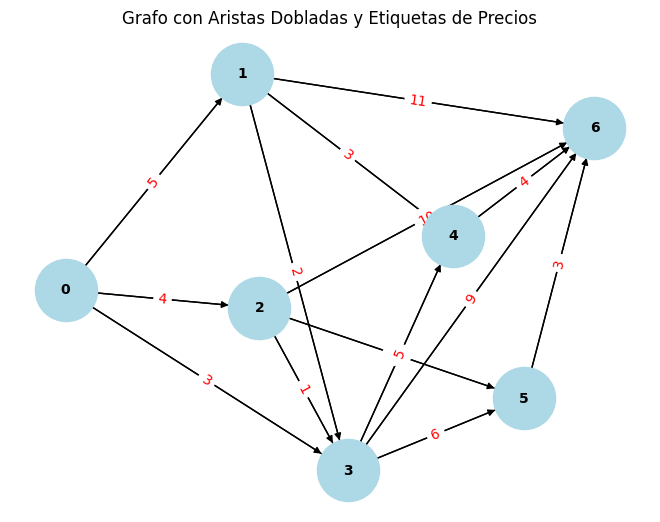

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# TARIFAS matriz (Matriz de adyacencia)
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

# Función para graficar el grafo con aristas dobladas
def plot_graph(tarifas):
    G = nx.DiGraph()  # Crear un grafo dirigido

    # Agregar aristas con pesos (precios) desde la matriz de tarifas
    num_nodes = len(tarifas)  # Número de nodos
    for i in range(num_nodes):
        for j in range(num_nodes):
            if tarifas[i][j] != 999 and i != j:  # Solo agregar conexiones válidas
                G.add_edge(i, j, weight=tarifas[i][j])  # Nodos numerados desde 0

    # Definir posiciones manualmente de los nodos (según la disposición solicitada)
    pos = {
        0: (0, 0),        # Nodo 0 en la columna más a la izquierda
        1: (1, 1.2),        # Nodo 1 en la segunda columna, fila 1
        2: (1.1, -0.1),        # Nodo 2 en la segunda columna, fila 0
        3: (1.6, -1),       # Nodo 3 en la segunda columna, fila -1
        4: (2.2, 0.3),      # Nodo 4 en la tercera columna, entre filas
        5: (2.6, -0.6),     # Nodo 5 en la tercera columna, entre filas
        6: (3, 0.9),        # Nodo 6 en la columna más a la derecha
    }

    # Dibujar los nodos
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')

    # Obtener las aristas y sus pesos (precios)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Dibujar aristas con curvatura
    curved_edges = [(u, v) for u, v in G.edges() if G.has_edge(v, u)]  # Aristas que deben estar dobladas
    straight_edges = list(set(G.edges()) - set(curved_edges))  # Aristas que pueden ser rectas

    # Dibujar las aristas rectas
    nx.draw_networkx_edges(G, pos, edgelist=straight_edges, arrowstyle='-|>', arrowsize=20, edge_color='black')

    # Dibujar las aristas curvas
    arc_rad = 0.25  # Radio de curvatura para las aristas
    nx.draw_networkx_edges(G, pos, edgelist=curved_edges, connectionstyle=f'arc3,rad={arc_rad}', arrowstyle='-|>', arrowsize=20, edge_color='black')

    # Dibujar etiquetas en las aristas (los precios)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Mostrar el gráfico
    plt.title('Grafo con Aristas Dobladas y Etiquetas de Precios')
    plt.show()

# Llamar a la función para graficar el grafo
plot_graph(TARIFAS)


In [9]:
print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

#Determinar la ruta con Recursividad
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return ""
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) +  \
                ',' + \
                str(RUTA[desde][hasta] \
              )

print("\nLa ruta es:")
calcular_ruta(RUTA, 0, 6)

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2,5'

In [10]:
#Practica individual
import random

def puntos_mas_cercanos(puntos):
    min_distancia = float('inf')  # Inicializar la mínima distancia como infinito
    punto1 = None
    punto2 = None

    # Iterar sobre todos los pares de puntos
    for i in range(len(puntos)):
        for j in range(i + 1, len(puntos)):
            distancia = abs(puntos[i] - puntos[j])  # Calcular la distancia
            if distancia < min_distancia:  # Si se encuentra una nueva mínima
                min_distancia = distancia
                punto1 = puntos[i]
                punto2 = puntos[j]

    return (punto1, punto2, min_distancia)

# Generar una lista aleatoria de 1000 números
puntos = random.sample(range(10000), 10)  # Números entre 0 y 9999
print("Puntos: "+str(puntos))

# Encontrar los dos puntos más cercanos
resultado = puntos_mas_cercanos(puntos)
print(f"Los puntos más cercanos son: {resultado[0]} y {resultado[1]} con una distancia de {resultado[2]}")


Puntos: [7180, 3150, 8571, 9530, 5691, 6003, 9958, 2532, 3440, 2311]
Los puntos más cercanos son: 2532 y 2311 con una distancia de 221


La complexidad es O(n^2) porque usamos dos bucles anidados. El primer bucle recorre cada punto (n veces), y el segundo bucle compara ese punto con todos los puntos restantes (aproximadamente n/2 en el peor de los casos). Por lo tanto, el número total de comparaciones es aproximadamente n(n-1)/2, que se simplifica a O(n^2). Se puede mejorar con divide y vinceras.

In [12]:
import random

def distancia_minima(puntos):
    # Función auxiliar que encuentra la distancia mínima y los puntos correspondientes en un arreglo
    min_dist = float('inf')
    closest_pair = (None, None)

    for i in range(len(puntos)):
        for j in range(i + 1, len(puntos)):
            dist = abs(puntos[i] - puntos[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (puntos[i], puntos[j])

    return min_dist, closest_pair


def puntos_mas_cercanos_recursivo(puntos):
    n = len(puntos)

    if n <= 2:  # Caso base: si hay 3 o menos puntos
        return distancia_minima(puntos)

    # Paso 2: Dividir el array en dos mitades
    mid = n // 2
    left_half = puntos[:mid]
    right_half = puntos[mid:]

    # Paso 3: Conquistar: encontrar la mínima distancia en cada mitad
    dist_left, closest_left = puntos_mas_cercanos_recursivo(left_half)
    dist_right, closest_right = puntos_mas_cercanos_recursivo(right_half)

    # Mínima distancia encontrada en ambas mitades
    if dist_left < dist_right:
        min_dist = dist_left
        closest_pair = closest_left
    else:
        min_dist = dist_right
        closest_pair = closest_right

    # Paso 4: Combinar (banda)
    mid_point = puntos[mid]
    strip = []

    for point in puntos:
        if abs(point - mid_point) < min_dist:
            strip.append(point)

    # Encontrar la mínima distancia en la banda
    min_strip_dist, closest_strip_pair = distancia_minima(strip)

    if min_strip_dist < min_dist:
        return min_strip_dist, closest_strip_pair

    return min_dist, closest_pair

# Encontrar los dos puntos más cercanos
distancia, (punto1, punto2) = puntos_mas_cercanos_recursivo(puntos)
print(f"Los puntos más cercanos son: {punto1} y {punto2} con una distancia de {distancia}")


Los puntos más cercanos son: 2532 y 2311 con una distancia de 221


Análisis de Complejidad

Caso Base:
En el caso base, donde hay tres o menos puntos, la función distancia_minima se llamará con pares de puntos, lo que tomará un tiempo constante
O(1) para calcular la distancia entre los puntos.

División:
La lista de puntos se divide en dos mitades. Esta división toma
O(1) tiempo.

Conquista:
La función se llama recursivamente en cada mitad:
Si n es el número total de puntos, en cada llamada recursiva se divide la lista en dos mitades, lo que crea dos subproblemas de tamaño aproximadamente n/2.
Así que el tiempo de la recursión en este paso se puede expresar como
T(n)=2T(n/2).

Combinación:
La parte de combinación implica calcular distancias para pares de puntos que están en la "banda" alrededor del punto medio.
En el peor de los casos, podrías tener que revisar todos los puntos en la banda, que es un conjunto de puntos que pueden estar cerca del punto medio. Supongamos que verificamos hasta k puntos en la banda.
La llamada a distancia_minima se hará para todos los pares en esta banda, y si asumimos que se hace en un tiempo constante O(1), entonces la complejidad para la combinación sería O(k^2).

Recurrencia
Dada la recursión y los costos descritos:
T(n)=2T(n/2)+O(k^2), donde k es el número de puntos en la banda.

Complejidad Final
Si la cantidad de puntos en la banda k (como en el codigo donde es 2) k es mucho menor que n, podríamos simplificar la ecuación. Así, la complejidad se asemejaría a T(n)=2T(n/2)+O(1). Esto es el caso optimo.

Usando el Teorema Maestro, se concluye que la solución a esta recurrencia es:

T(n)=O(nlogn)

In [13]:
# Código para Puntos en 2D
import random
import math

def distancia(punto1, punto2):
    # Calcular la distancia euclidiana entre dos puntos en 2D
    return math.sqrt((punto1[0] - punto2[0]) ** 2 + (punto1[1] - punto2[1]) ** 2)

def distancia_minima(puntos):
    min_dist = float('inf')
    closest_pair = (None, None)

    for i in range(len(puntos)):
        for j in range(i + 1, len(puntos)):
            dist = distancia(puntos[i], puntos[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (puntos[i], puntos[j])

    return min_dist, closest_pair

def puntos_mas_cercanos_recursivo(puntos):
    n = len(puntos)

    if n <= 2:  # Caso base: si hay 2 o menos puntos
        return distancia_minima(puntos)

    # Paso 2: Dividir el array en dos mitades
    mid = n // 2
    left_half = puntos[:mid]
    right_half = puntos[mid:]

    # Paso 3: Conquistar: encontrar la mínima distancia en cada mitad
    dist_left, closest_left = puntos_mas_cercanos_recursivo(left_half)
    dist_right, closest_right = puntos_mas_cercanos_recursivo(right_half)

    # Mínima distancia encontrada en ambas mitades
    if dist_left < dist_right:
        min_dist = dist_left
        closest_pair = closest_left
    else:
        min_dist = dist_right
        closest_pair = closest_right

    # Paso 4: Combinar (banda)
    mid_point = puntos[mid]
    strip = []

    for point in puntos:
        if abs(point[0] - mid_point[0]) < min_dist:
            strip.append(point)

    # Encontrar la mínima distancia en la banda
    min_strip_dist, closest_strip_pair = distancia_minima(strip)

    if min_strip_dist < min_dist:
        return min_strip_dist, closest_strip_pair

    return min_dist, closest_pair

# Generar una lista aleatoria de 1000 puntos en 2D
puntos = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(1000)]

# Encontrar los dos puntos más cercanos
distancia, (punto1, punto2) = puntos_mas_cercanos_recursivo(puntos)
print(f"Los puntos más cercanos son: {punto1} y {punto2} con una distancia de {distancia:.2f}")


Los puntos más cercanos son: (615, 938) y (616, 939) con una distancia de 1.41


In [15]:
# Código para Puntos en 3D
import random
import math

def distancia(punto1, punto2):
    # Calcular la distancia euclidiana entre dos puntos en 3D
    return math.sqrt((punto1[0] - punto2[0]) ** 2 +
                     (punto1[1] - punto2[1]) ** 2 +
                     (punto1[2] - punto2[2]) ** 2)

def distancia_minima(puntos):
    min_dist = float('inf')
    closest_pair = (None, None)

    for i in range(len(puntos)):
        for j in range(i + 1, len(puntos)):
            dist = distancia(puntos[i], puntos[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (puntos[i], puntos[j])

    return min_dist, closest_pair

def puntos_mas_cercanos_recursivo(puntos):
    n = len(puntos)

    if n <= 3:  # Caso base: si hay 3 o menos puntos
        return distancia_minima(puntos)

    # Paso 2: Dividir el array en dos mitades
    mid = n // 2
    left_half = puntos[:mid]
    right_half = puntos[mid:]

    # Paso 3: Conquistar: encontrar la mínima distancia en cada mitad
    dist_left, closest_left = puntos_mas_cercanos_recursivo(left_half)
    dist_right, closest_right = puntos_mas_cercanos_recursivo(right_half)

    # Mínima distancia encontrada en ambas mitades
    if dist_left < dist_right:
        min_dist = dist_left
        closest_pair = closest_left
    else:
        min_dist = dist_right
        closest_pair = closest_right

    # Paso 4: Combinar (banda)
    mid_point = puntos[mid]
    strip = []

    for point in puntos:
        if abs(point[0] - mid_point[0]) < min_dist:
            strip.append(point)

    # Encontrar la mínima distancia en la banda
    min_strip_dist, closest_strip_pair = distancia_minima(strip)

    if min_strip_dist < min_dist:
        return min_strip_dist, closest_strip_pair

    return min_dist, closest_pair

# Generar una lista aleatoria de 1000 puntos en 3D
puntos = [(random.randint(0, 10000), random.randint(0, 10000), random.randint(0, 10000)) for _ in range(1000)]

# Encontrar los dos puntos más cercanos
distancia, (punto1, punto2) = puntos_mas_cercanos_recursivo(puntos)
print(f"Los puntos más cercanos son: {punto1} y {punto2} con una distancia de {distancia:.2f}")


Los puntos más cercanos son: (9741, 8738, 2444) y (9692, 8791, 2562) con una distancia de 138.33
